<a href="https://colab.research.google.com/github/yousrabougara/WalmartSalesForecasting/blob/main/AutoGluonTimeSeriesAndMultimodelLagFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We use uv for faster installation
!pip install uv
!uv pip install -q autogluon.timeseries --system
!uv pip uninstall -q torchaudio torchvision torchtext --system # fix incompatible package versions on Colab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 52.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

# Load your Walmart data
df = pd.read_csv('clean_Walmart.csv')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# If store IDs are spread across columns, convert them into a single 'Store' column
store_cols = ['Store_0', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5']
df = df.melt(id_vars=['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
                       'Unemployment', 'Month', 'Year', 'Season_0',
                       'Season_1', 'Season_2', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4'],
             value_vars=store_cols,
             var_name='Store', value_name='Store_Value')

df = df[df['Store_Value'] == 1].drop('Store_Value', axis=1)  # Filter active stores


In [ ]:
# Rename the columns for clarity
df = df.rename(columns={'Weekly_Sales': 'target'})

train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="Store",
    timestamp_column="Date"
)


In [ ]:
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

# Ensure data is sorted and complete
df = df.sort_values(by=["Store", "Date"])

# Convert to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="Store",
    timestamp_column="Date",
)

# Create and fit the predictor with explicit frequency
predictor = TimeSeriesPredictor(
    prediction_length=4,  # Weekly forecast horizon
    path="autogluon-walmart-sales",
    target="target",
    eval_metric="MASE",
    freq="W"  # Explicitly setting weekly frequency
)

predictor.fit(train_data, presets="medium_quality", time_limit=600)


Frequency 'W' stored as 'W-SUN'
Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/content/autogluon-walmart-sales'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       11.16 GB / 12.67 GB (88.0%)
Disk Space Avail:   75.55 GB / 107.72 GB (70.1%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'W-SUN',
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 4,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

train_data with fre

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/191M [00:00<?, ?B/s]

	-0.3190       = Validation score (-MASE)
	14.75   s     = Training runtime
	6.73    s     = Validation (prediction) runtime
Training timeseries model TemporalFusionTransformer. Training for up to 269.4s of the 538.8s of remaining time.
	-0.2004       = Validation score (-MASE)
	196.66  s     = Training runtime
	0.04    s     = Validation (prediction) runtime
Fitting simple weighted ensemble.
	Ensemble weights: {'Chronos[bolt_small]': 0.06, 'DirectTabular': 0.04, 'ETS': 0.01, 'TemporalFusionTransformer': 0.72, 'Theta': 0.17}
	-0.1249       = Validation score (-MASE)
	0.52    s     = Training runtime
	35.92   s     = Validation (prediction) runtime
Training complete. Models trained: ['Naive', 'SeasonalNaive', 'RecursiveTabular', 'DirectTabular', 'ETS', 'Theta', 'Chronos[bolt_small]', 'TemporalFusionTransformer', 'WeightedEnsemble']
Total runtime: 257.43 s
Best model: WeightedEnsemble
Best model score: -0.1249


data with frequency 'None' has been resampled to frequency 'W-SUN'.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
data with frequency 'None' has been resampled to frequency 'W-SUN'.


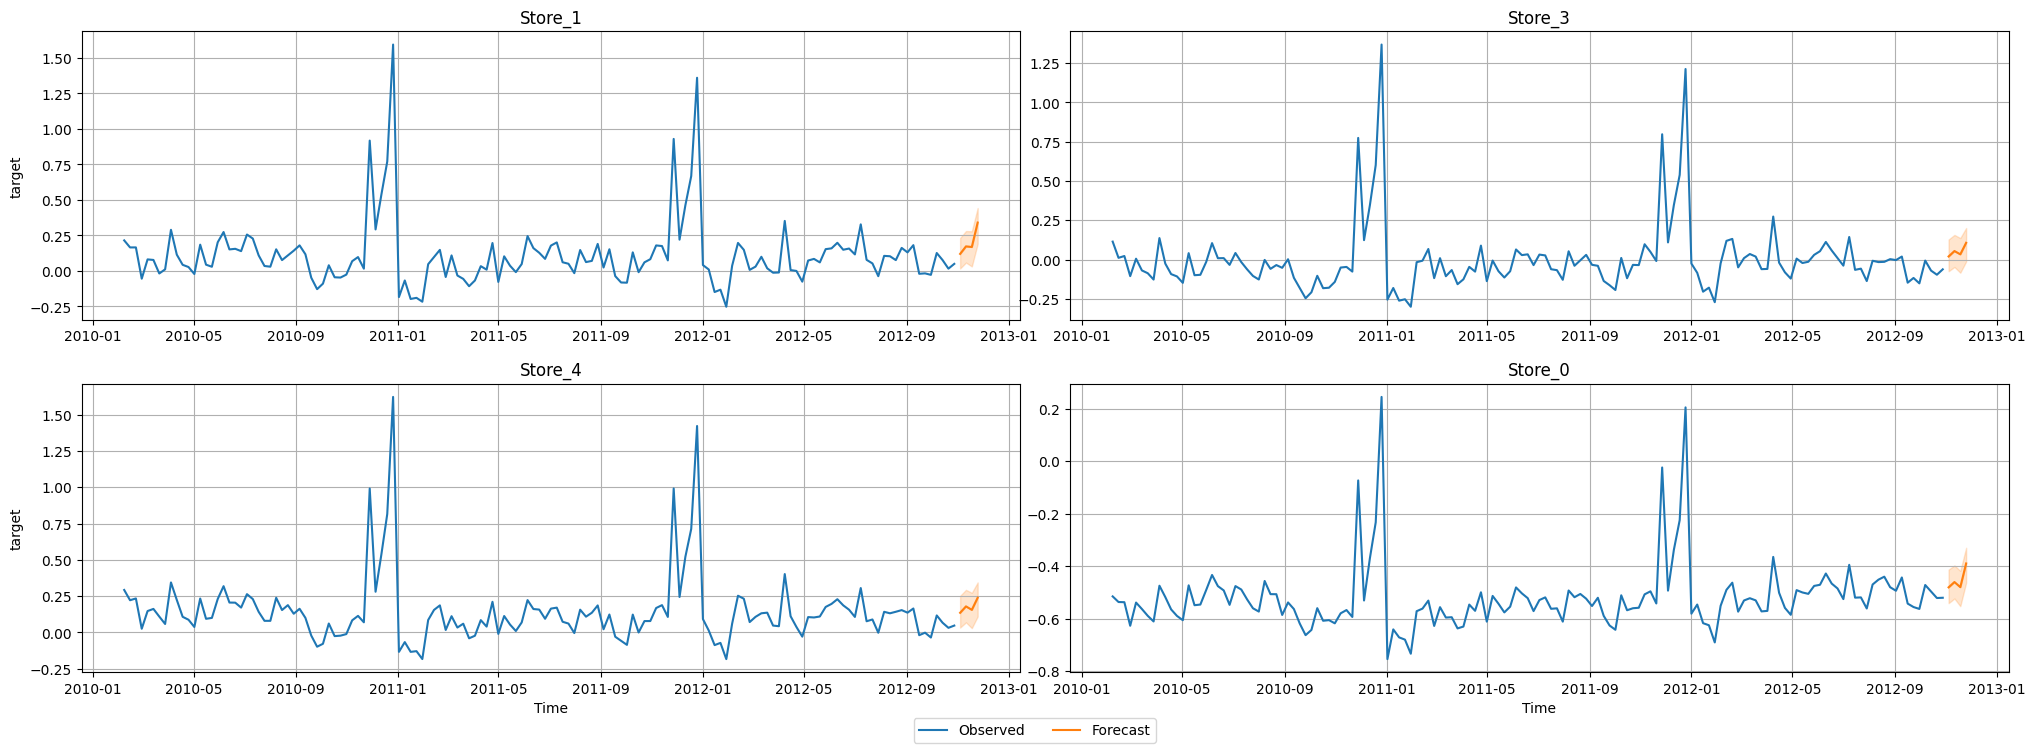

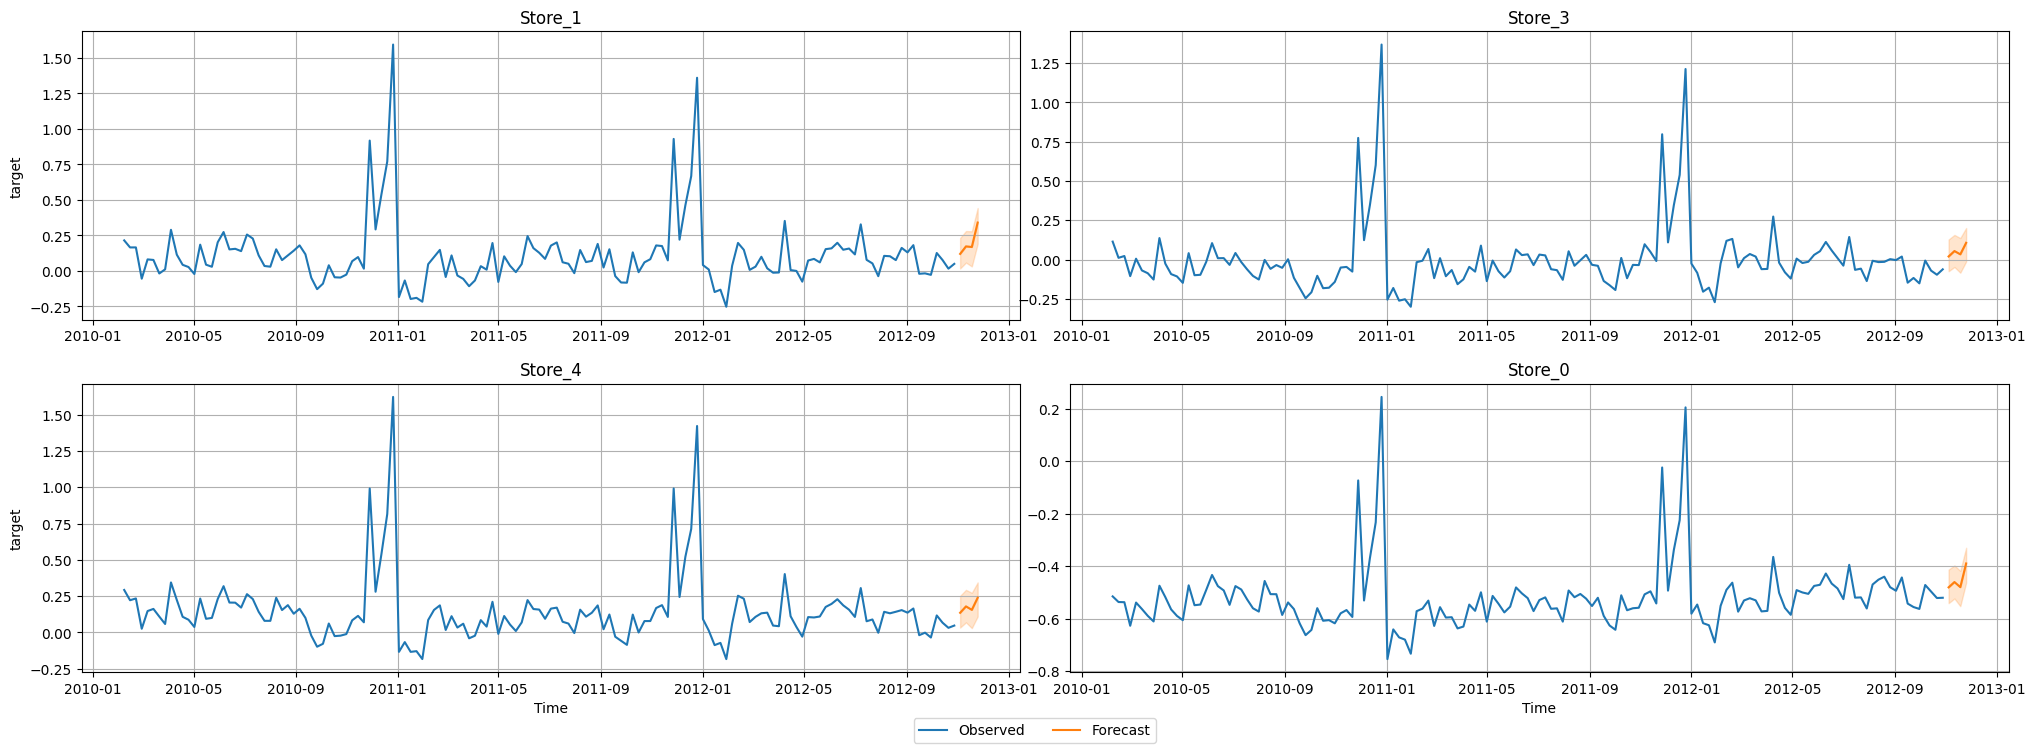

In [ ]:
# Make predictions
predictions = predictor.predict(train_data)
predictions.head()

# Plot forecasts for test data (assuming test_data is defined)
predictor.plot(train_data, predictions, quantile_levels=[0.1, 0.9], max_history_length=200, max_num_item_ids=4)


In [ ]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 52.1 MB/s eta 0:00:00

In [ ]:
import pandas as pd
from autogluon.multimodal import MultiModalPredictor

# Load your dataset
df = pd.read_csv('clean_Walmart.csv')

# Define features and target
target = 'Weekly_Sales'
features = df.columns.drop(['Weekly_Sales', 'Date', 'Year'])

# Train-test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)


In [ ]:
# Combine train features and target into one DataFrame for AutoGluon
train_data[target] = train_data[target]

# Initialize the predictor
predictor = MultiModalPredictor(label=target)

# Fit the model
predictor.fit(train_data=train_data, time_limit=2000)  # Set time_limit as needed


No path specified. Models will be saved in: "AutogluonModels/ag-20250210_211629"
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.5.1+cu124
CUDA Version:       CUDA is not available
Memory Avail:       9.67 GB / 12.67 GB (76.3%)
Disk Space Avail:   73.58 GB / 107.72 GB (68.3%)
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (4.788204482928808, -1.4831558702051406, -0.01003, 0.99909)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To t

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 15: 'val_rmse' reached 0.44547 (best 0.44547), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=0-step=15.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 31: 'val_rmse' reached 0.29689 (best 0.29689), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=0-step=31.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 47: 'val_rmse' reached 0.29786 (best 0.29689), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=1-step=47.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 63: 'val_rmse' reached 0.28299 (best 0.28299), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=1-step=63.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 79: 'val_rmse' reached 0.26759 (best 0.26759), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=2-step=79.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 95: 'val_rmse' reached 0.26050 (best 0.26050), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=2-step=95.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 111: 'val_rmse' reached 0.23958 (best 0.23958), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=3-step=111.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 127: 'val_rmse' reached 0.24371 (best 0.23958), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=3-step=127.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 143: 'val_rmse' reached 0.23352 (best 0.23352), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=4-step=143.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 159: 'val_rmse' reached 0.23396 (best 0.23352), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=4-step=159.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 175: 'val_rmse' reached 0.22309 (best 0.22309), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=5-step=175.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 191: 'val_rmse' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 207: 'val_rmse' reached 0.20664 (best 0.20664), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=6-step=207.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 223: 'val_rmse' reached 0.20992 (best 0.20664), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=6-step=223.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 239: 'val_rmse' reached 0.21445 (best 0.20664), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=7-step=239.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 255: 'val_rmse' reached 0.17381 (best 0.17381), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=7-step=255.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 271: 'val_rmse' reached 0.17437 (best 0.17381), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=8-step=271.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 287: 'val_rmse' reached 0.19184 (best 0.17381), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=8-step=287.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 303: 'val_rmse' reached 0.16230 (best 0.16230), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=9-step=303.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 319: 'val_rmse' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 335: 'val_rmse' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 351: 'val_rmse' reached 0.16225 (best 0.16225), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=10-step=351.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 367: 'val_rmse' reached 0.17074 (best 0.16225), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=11-step=367.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 383: 'val_rmse' reached 0.16290 (best 0.16225), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=11-step=383.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 12, global step 399: 'val_rmse' reached 0.14851 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=12-step=399.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 12, global step 415: 'val_rmse' reached 0.16209 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=12-step=415.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 13, global step 431: 'val_rmse' reached 0.16030 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=13-step=431.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 13, global step 447: 'val_rmse' reached 0.15594 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=13-step=447.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 14, global step 463: 'val_rmse' reached 0.15903 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=14-step=463.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 14, global step 479: 'val_rmse' reached 0.15236 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=14-step=479.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 15, global step 495: 'val_rmse' reached 0.15033 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=15-step=495.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 15, global step 511: 'val_rmse' reached 0.15180 (best 0.14851), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=15-step=511.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 16, global step 527: 'val_rmse' reached 0.14717 (best 0.14717), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=16-step=527.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 16, global step 543: 'val_rmse' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 17, global step 559: 'val_rmse' reached 0.14721 (best 0.14717), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=17-step=559.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 17, global step 575: 'val_rmse' reached 0.14720 (best 0.14717), saving model to '/content/AutogluonModels/ag-20250210_211629/epoch=17-step=575.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 18, global step 591: 'val_rmse' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 18, global step 607: 'val_rmse' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 19, global step 623: 'val_rmse' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 19, global step 639: 'val_rmse' was not in top 3
INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20250210_211629")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
# Drop the target column from test data before prediction
predictions = predictor.predict(test_data.drop(columns=[target]))
print("Predictions:\n", predictions.head())

# Model evaluation
scores = predictor.evaluate(test_data)
print("Evaluation scores:\n", scores)


Predicting: |          | 0/? [00:00<?, ?it/s]

Predictions:
 2436    0.126661
3361    0.582383
233     1.299813
3667   -0.039081
5011   -1.141363
Name: Weekly_Sales, dtype: float32


Predicting: |          | 0/? [00:00<?, ?it/s]

Evaluation scores:
 {'rmse': 0.19288123254826262}


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np


In [ ]:
# Get ground truth and predictions
y_true = test_data[target].values
y_pred = predictor.predict(test_data.drop(columns=[target]))

# Compute Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Display Results
print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAPE: {mape * 100:.2f}%")


Predicting: |          | 0/? [00:00<?, ?it/s]

Model Evaluation Metrics:
MAE: 0.11
MSE: 0.04
RMSE: 0.19
R²: 0.96
MAPE: 107.46%
